<a href="https://colab.research.google.com/github/ZhiCLiu/DS-WorkShop/blob/main/Introduction_to_Torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch #This is new, please note this.
import numpy as np
import matplotlib.pyplot as plt

The ideal manner to think of torch is as Numpy with a few add ons (Numpy on steroids?). 
In the numpy facet, you get access to data structures that are "like" numpy arrays, called torch tensors...along with all the operations (like linear algebra, trig functions, randomization, etc)

The add ons include GPU support, Automatic differentiation (AD) and a few predefined classes and methods for different layers, optimizers, data streams, etc. 

In [ ]:
np_scalar = np.array(42)
np_vector = np.array([1., 2., 3.])
np_matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])

print(np_scalar)
print(np_vector)
print(np_matrix)

42
[1. 2. 3.]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
print(np_scalar.shape)
print(np_vector.shape)
print(np_matrix.shape)

()
(3,)
(3, 3)


In [ ]:
print(np_scalar.dtype)
print(np_vector.dtype)
print(np_matrix.dtype)

int64
float64
int64


In [ ]:
torch_scalar = torch.tensor(42)
torch_vector = torch.tensor([1., 2., 3.])
torch_matrix = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])

print(torch_scalar)
print(torch_vector)
print(torch_matrix)

tensor(42)
tensor([1., 2., 3.])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [ ]:
print(torch_scalar.shape)
print(torch_vector.shape)
print(torch_matrix.shape)

torch.Size([])
torch.Size([3])
torch.Size([3, 3])


In [ ]:
print(torch_scalar.dtype)
print(torch_vector.dtype) #Please note this when converting numpy data to torch tensors.
print(torch_matrix.dtype)

torch.int64
torch.float32
torch.int64


In [ ]:
t = torch.from_numpy(np_vector)
t

tensor([1., 2., 3.], dtype=torch.float64)

In [ ]:
torch_vector.numpy()

array([1., 2., 3.], dtype=float32)

(Some) torch operations on tensors


In [ ]:
torch.sin(torch_vector)

tensor([0.8415, 0.9093, 0.1411])

In [ ]:
torch.zeros_like(torch_vector)

tensor([0., 0., 0.])

In [ ]:
temp = torch.arange(1,10, dtype=torch.float)
temp = temp.reshape((3,3))
print(temp)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


In [ ]:
temp @ torch_vector

tensor([14., 32., 50.])

In [ ]:
t1 = torch.tensor([[1,2,3]])
t2 = torch.tensor([[4,5,6]])
t3 = torch.tensor([[7,8,9]])


In [ ]:
tstack = torch.stack((t1,t2,t3, t1, t2), dim=0) #along new axis
print(tstack)
print(tstack.shape)

tensor([[[1, 2, 3]],

        [[4, 5, 6]],

        [[7, 8, 9]],

        [[1, 2, 3]],

        [[4, 5, 6]]])
torch.Size([5, 1, 3])


In [ ]:
tcat = torch.cat((t1,t2,t3), dim=0) #along extant axis
print(tcat)
print(tcat.shape)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
torch.Size([3, 3])


In [ ]:
temp = torch.arange(1,7, dtype=torch.float)
temp = temp.reshape((3,2))
temp

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [ ]:
torch.sum(temp, dim=0)

tensor([ 9., 12.])

In [ ]:
torch.sum(temp, dim=1)

tensor([ 3.,  7., 11.])

In [ ]:
max_val, max_arg = torch.max(temp, dim=0)
print(max_val)
print(max_arg)

tensor([5., 6.])
tensor([2, 2])


In [ ]:
rand_normal = torch.randn((2,3))
rand_normal

tensor([[-0.2998,  0.3436,  0.8893],
        [ 0.4373,  0.7932, -1.8380]])

In [ ]:
torch.randn?

Automatic Differentiation (aka AD or more commonly, AutoDiff) enables the automated calculation of the gradients of a quantity with respect to all the variables on its graph (that have the requisite flag).

In [ ]:
X = torch.tensor(4.0)
W = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)

In [ ]:
print(W.grad)
print(b.grad)

None
None


In [ ]:
Y = W*X + b 
print(Y)

tensor(11., grad_fn=<AddBackward0>)


In [ ]:
Y.backward() #This generates the gradients.

In [ ]:
print(W.grad)
print(b.grad)

tensor(4.)
tensor(1.)


In [ ]:
a = torch.tensor(3.0)
b = torch.tensor(5.0)
a = a+b #this creates a copy
a

In [ ]:
a = torch.tensor(3.0)
b = torch.tensor(5.0)
a += b #this adds b to the value of a. This is the correct choice for a requires_grad variable
a

Illustration for estimating a variable via grad operations

In [ ]:
x = torch.tensor(3.0)
y = torch.tensor(9.0) #3.0*x... W_ideal*x
W = torch.tensor(0.01, requires_grad=True)

W:  tensor(2.5890, requires_grad=True)


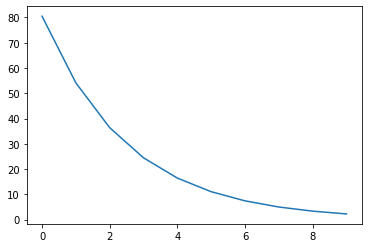

In [ ]:
losses = []
for _ in range(10):
  yhat = W*x
  loss = torch.square((y-yhat))
  loss.backward() #dL/dW = W.grad
  
  with torch.no_grad(): #because we dont need these operations to be logged in the gradient graph
    W -= 0.01*W.grad 
    W.grad.zero_() #to offset accumulation

  loss_detached = loss.detach().item()
  losses.append(loss_detached)


print("W: ", W)
plt.plot(losses);